<a href="https://colab.research.google.com/github/maglkp/kaggle/blob/master/cifardw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:

# from keras.datasets import cifar10
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# import matplotlib.pyplot as plt
# import numpy as np
# from keras.utils import to_categorical
# np.random.seed(0)

In [0]:
import tensorflow as tf 
import os

from tensorflow.python.keras.datasets import cifar10
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
import matplotlib.pyplot as plt
import numpy as np
from keras.utils import to_categorical
np.random.seed(0)

In [4]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, X_test.shape

170500096/170498071 [==============================] - 7s 0us/step


((50000, 32, 32, 3), (10000, 32, 32, 3))

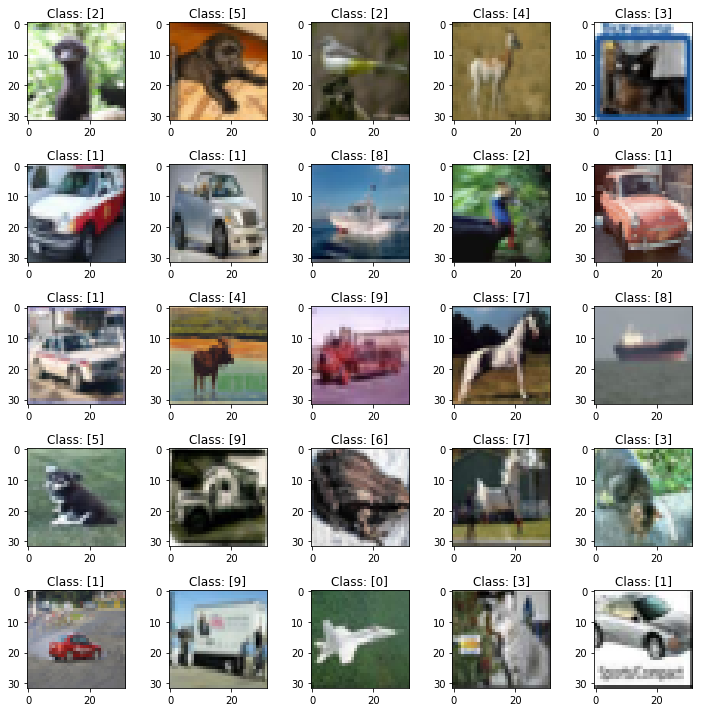

In [5]:
plt.figure(figsize=(10, 10))
for idx in range(25):
    plt.subplot(5, 5, idx + 1)
    plt.imshow(X_train[idx+55], cmap='inferno', interpolation='none')
    plt.title('Class: {}'.format(y_train[idx+55]))
plt.tight_layout()

In [6]:
num_channels = 3
img_rows, img_cols = X_train.shape[1], X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, num_channels)

X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, num_channels)
input_shape = (img_rows, img_cols, num_channels)
X_train.shape, X_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3))

In [0]:
if np.max(X_train)> 1: X_train = X_train / 255
if np.max(X_test)> 1: X_test = X_test / 255

In [0]:
if len(y_train.shape) == 2:
  y_train = y_train.reshape(-1)
  y_test = y_test.reshape(-1)
  
if len(y_train.shape) == 1:
  num_classes = len(set(y_train))
  y_train = to_categorical(y_train, num_classes)
  y_test = to_categorical(y_test, num_classes)

In [9]:
y_train.shape, y_test.shape, num_classes

((50000, 10), (10000, 10), 10)

In [10]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=input_shape),
    Conv2D(filters=32, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.25),
    
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.25),
        
    Conv2D(filters=128, kernel_size=(3,3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(.25),    
    
    Flatten(),    
    
    Dense(1024, activation='relu'),
    Dropout(.5),    
    Dense(num_classes, activation='softmax')
])

model.compile(metrics=['accuracy'], optimizer='adam', loss='categorical_crossentropy')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
TPU_WORKER = 'grpc://' + os.environ['COLAB_TPU_ADDR']
tf.logging.set_verbosity(tf.logging.INFO)

In [13]:
tpu_model = tf.contrib.tpu.keras_to_tpu_model(
            model,
            strategy = tf.contrib.tpu.TPUDistributionStrategy(tf.contrib.cluster_resolver.TPUClusterResolver(TPU_WORKER)))


For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
If you depend on functionality not listed there, please file an issue.

INFO:tensorflow:Querying Tensorflow master (grpc://10.63.191.106:8470) for TPU system metadata.
INFO:tensorflow:Found TPU system:
INFO:tensorflow:*** Num TPU Cores: 8
INFO:tensorflow:*** Num TPU Workers: 1
INFO:tensorflow:*** Num TPU Cores Per Worker: 8
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, -1, 15730285798998496446)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 14402661186207575782)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 15552316879937821484)
INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TP

In [27]:
model.fit(X_train, y_train, batch_size=256, 
          epochs=10, verbose=2, validation_data=(X_test, y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
 - 9s - loss: 1.9406 - acc: 0.2623 - val_loss: 1.6576 - val_acc: 0.3829
Epoch 2/10
 - 8s - loss: 1.5408 - acc: 0.4269 - val_loss: 1.4038 - val_acc: 0.4881
Epoch 3/10
 - 8s - loss: 1.3574 - acc: 0.5071 - val_loss: 1.2266 - val_acc: 0.5690
Epoch 4/10
 - 8s - loss: 1.2437 - acc: 0.5528 - val_loss: 1.1513 - val_acc: 0.6003
Epoch 5/10
 - 8s - loss: 1.1637 - acc: 0.5834 - val_loss: 1.0555 - val_acc: 0.6339
Epoch 6/10
 - 9s - loss: 1.1073 - acc: 0.6056 - val_loss: 1.0052 - val_acc: 0.6494
Epoch 7/10
 - 9s - loss: 1.0464 - acc: 0.6316 - val_loss: 0.9775 - val_acc: 0.6623
Epoch 8/10
 - 9s - loss: 1.0111 - acc: 0.6438 - val_loss: 0.9973 - val_acc: 0.6535
Epoch 9/10
 - 9s - loss: 0.9769 - acc: 0.6554 - val_loss: 0.9215 - val_acc: 0.6844
Epoch 10/10
 - 9s - loss: 0.9415 - acc: 0.6681 - val_loss: 0.8882 - val_acc: 0.6913


In [14]:
tpu_model.fit(X_train, y_train, batch_size=128*8, 
          epochs=20, validation_split=.2)

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
INFO:tensorflow:New input shapes; (re-)compiling: mode=train (# of cores 8), [TensorSpec(shape=(128,), dtype=tf.int32, name='core_id0'), TensorSpec(shape=(128, 32, 32, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(128, 10), dtype=tf.float32, name='dense_1_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Cloning Adam {'lr': 0.0010000000474974513, 'beta_1': 0.8999999761581421, 'beta_2': 0.9990000128746033, 'decay': 0.0, 'epsilon': 1e-07, 'amsgrad': False}
INFO:tensorflow:Remapping placeholder for conv2d_input
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7fc05f7e5a58> []
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 3.934086561203003 secs
INFO:tensorflow:Setting weights on TPU model.
INFO:tensorflow:CPU -> TPU 

In [28]:
model.evaluate(X_test, y_test)

10000/10000 [==============================] - 2s 152us/step


[0.8882454841613769, 0.6913]

In [15]:
tpu_model.evaluate(X_test, y_test)

INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(4,), dtype=tf.int32, name='core_id_10'), TensorSpec(shape=(4, 32, 32, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(4, 10), dtype=tf.float32, name='dense_1_target_30')]
INFO:tensorflow:Overriding default placeholder.
INFO:tensorflow:Remapping placeholder for conv2d_input
INFO:tensorflow:KerasCrossShard: <tensorflow.python.keras.optimizers.Adam object at 0x7fc05b725668> []
INFO:tensorflow:Started compiling
INFO:tensorflow:Finished compiling. Time elapsed: 2.021742820739746 secs
 9792/10000 [============================>.] - ETA: 0s - loss: 1.2338 - acc: 0.5528INFO:tensorflow:New input shapes; (re-)compiling: mode=eval (# of cores 8), [TensorSpec(shape=(2,), dtype=tf.int32, name='core_id_10'), TensorSpec(shape=(2, 32, 32, 3), dtype=tf.float32, name='conv2d_input_10'), TensorSpec(shape=(2, 10), dtype=tf.float32, name='dense_1_target_30')]
INFO:tensorflow:Overriding default pla

[1.233734651184082, 0.5521]